# Visualizing the Thomas Fire Scar through False Color Imagery
#### Author: Ryan Green
#### GitHub Repository: https://github.com/ryangreen6/eds220-hw4

- The purpose of this notebook is to show how to load data, filter it, and save that filtered data into a new, easier to work with shape file. This code is used also in the `fire-scar` notebook, where the Thomas Fire shapefile is used to create a map on top of landsat imagery. 

- The most important aspects of this notebook are loading in libraries used to work with spatial data, as well as loading in data using appropriate filepaths. This data was retrieved from Data.gov, a great resource for data within the US. The data was retrieved from this link specifically: https://catalog.data.gov/dataset/california-fire-perimeters-all-b3436

- `fires` is a dataset including all fires in California since 1878, and includes geometry for all their recorded perimeters.
- `thomas_fire` is a shapefile I created, isolating the 2017 Thomas Fire from the entire `fires` dataset. 

Loading Libraries

In [27]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import xarray as xr
import rioxarray as rioxr
import matplotlib.pyplot as plt

2a. I retrieved this data on the perimeter of the Thomas Fire from Data.gov, at the following url: https://catalog.data.gov/dataset/california-fire-perimeters-all-b3436.
This data is in EPSG:3857 and is projected. This data comes from a larger dataset of all fire perimeters in California since 1878, and I queried while loading the data to narrow down to the Thomas Fire in 2017. Did you know there were 7 other Thomas Fires?


Loading Data

In [28]:
fires = gpd.read_file("fire_perimeters/California_Fire_Perimeters_(all).shp")

#2b
thomas_fire = fires[(fires['FIRE_NAME'] == 'THOMAS') & (fires['YEAR_'] == 2017)]

#2c
thomas_fire.to_file("data/thomas_fire.shp")

# Data retrieved from: https://catalog.data.gov/dataset/california-fire-perimeters-all-b3436

2d. I chose the .shp file format because this is a polygon shape. 

Simple data exploration on Fires

In [29]:
print(fires.shape)
print(fires.dtypes)

(22261, 19)
YEAR_            int64
STATE           object
AGENCY          object
UNIT_ID         object
FIRE_NAME       object
INC_NUM         object
ALARM_DATE      object
CONT_DATE       object
CAUSE            int64
C_METHOD         int64
OBJECTIVE        int64
GIS_ACRES      float64
COMMENTS        object
COMPLEX_NA      object
IRWINID         object
FIRE_NUM        object
COMPLEX_ID      object
DECADES          int64
geometry      geometry
dtype: object


Simple data exploration on thomas_fire

In [30]:
fires.head()

,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,C_METHOD,OBJECTIVE,GIS_ACRES,COMMENTS,COMPLEX_NA,IRWINID,FIRE_NUM,COMPLEX_ID,DECADES,geometry
0,2023,CA,CDF,SKU,WHITWORTH,00004808,2023-06-17,2023-06-17,5,1,1,5.72913,None,None,{7985848C-0AC2-4BA4-8F0E-29F778652E61},None,None,2020,"POLYGON ((-13682443.000 5091132.739, -13682445..."
1,2023,CA,LRA,BTU,KAISER,00010225,2023-06-02,2023-06-02,5,1,1,13.60240,None,None,{43EBCC88-B3AC-48EB-8EF5-417FE0939CCF},None,None,2020,"POLYGON ((-13576727.142 4841226.161, -13576726..."
2,2023,CA,CDF,AEU,JACKSON,00017640,2023-07-01,2023-07-02,2,1,1,27.81450,None,None,{B64E1355-BF1D-441A-95D0-BC1FBB93483B},None,None,2020,"POLYGON ((-13459243.000 4621236.000, -13458968..."
3,2023,CA,CDF,AEU,CARBON,00018821,2023-07-11,2023-07-11,9,1,1,58.76020,None,None,{CB41DB0A-E4B1-489D-A4EA-738F2CD6DB3B},None,None,2020,"POLYGON ((-13468077.000 4642260.000, -13467975..."
4,2023,CA,CDF,AEU,LIBERTY,00018876,2023-07-11,2023-07-12,14,1,1,70.97900,None,None,{F83F70A4-07A7-40B8-BD51-10CCC1C30D63},None,None,2020,"POLYGON ((-13468418.000 4614853.000, -13468428..."


In [31]:
print(thomas_fire.shape)
print(thomas_fire.dtypes)

(1, 19)
YEAR_            int64
STATE           object
AGENCY          object
UNIT_ID         object
FIRE_NAME       object
INC_NUM         object
ALARM_DATE      object
CONT_DATE       object
CAUSE            int64
C_METHOD         int64
OBJECTIVE        int64
GIS_ACRES      float64
COMMENTS        object
COMPLEX_NA      object
IRWINID         object
FIRE_NUM        object
COMPLEX_ID      object
DECADES          int64
geometry      geometry
dtype: object


Plotting thomas_fire

<Axes: >

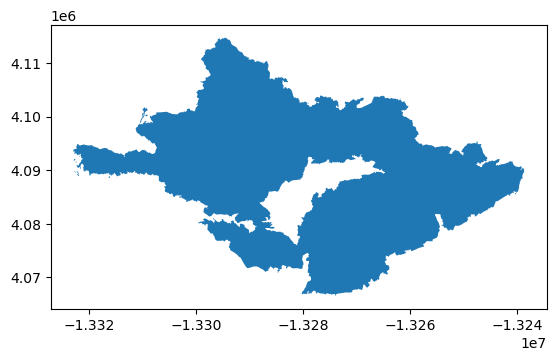

In [32]:
thomas_fire.plot()

We can also plot only the boundary of the shapefile by using `.boundary`

Plotting thomas_fire boundary using `.boundary()`

<Axes: >

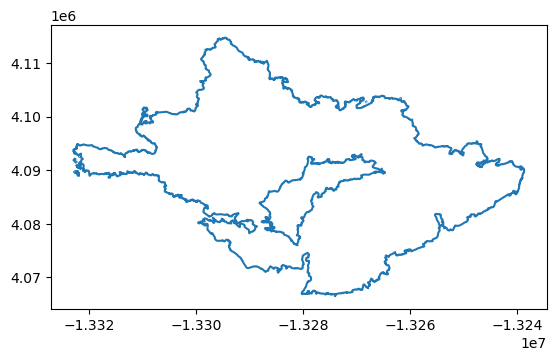

In [33]:
thomas_fire.boundary.plot()